<h1>TUGAS BESAR MATA KULIAH PEMBELAJARAN MESIN</h1>

<b>Muhammad Hafidh Raditya</b>
<p></p>
<b>IF-42-03</b>
<p></p>
<b>1301184079</b>


<p>Import library yang diperlukan</p>

In [2]:
import random as rd
import pandas as p
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import style
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
warnings.filterwarnings('ignore')

In [5]:
dataset = pd.read_csv("salju_train.csv")
dataset.head()
dataset.shape

(109095, 24)

In [58]:
dataset.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,109095.000000,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,54548.000000,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,31493.158146,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,27274.500000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,81821.500000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,109095.000000,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


<h2>Data Pre-processing</h2>

<p>Drop record yang terdapat missing values</p>

In [59]:
dataset.dropna(inplace=True)
dataset.shape

(42411, 24)

In [60]:
dataset.isnull().sum().sum()

0

<p>Mengconvert categorical attribute menjadi numerical attribute agar dapat dilihat korelasinya</p>

In [61]:
categorical = dataset.dtypes==object
categorical_cols = dataset.columns[categorical].tolist()
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
dataset[categorical_cols].head()
dataset

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,4,849,15,7.3,24.5,0.0,8.4,10.4,11,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5,3188,23,5.9,20.3,0.0,3.6,12.6,3,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,6,1271,2,14.4,21.8,0.0,3.2,4.4,12,39.0,...,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7,1380,15,7.7,18.7,0.2,5.6,9.7,14,46.0,...,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,9,1903,24,18.4,35.3,0.0,10.0,12.5,1,33.0,...,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,109081,232,18,16.8,34.1,0.0,12.8,10.3,1,85.0,...,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,0,0
109082,109083,2396,4,8.7,19.0,0.0,1.4,9.6,13,24.0,...,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,109089,1877,6,14.3,26.2,0.0,8.0,12.6,5,50.0,...,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,109091,3309,17,20.1,23.7,0.0,7.2,8.9,2,43.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,1


<p> lihat korelasi antar atribut </p>

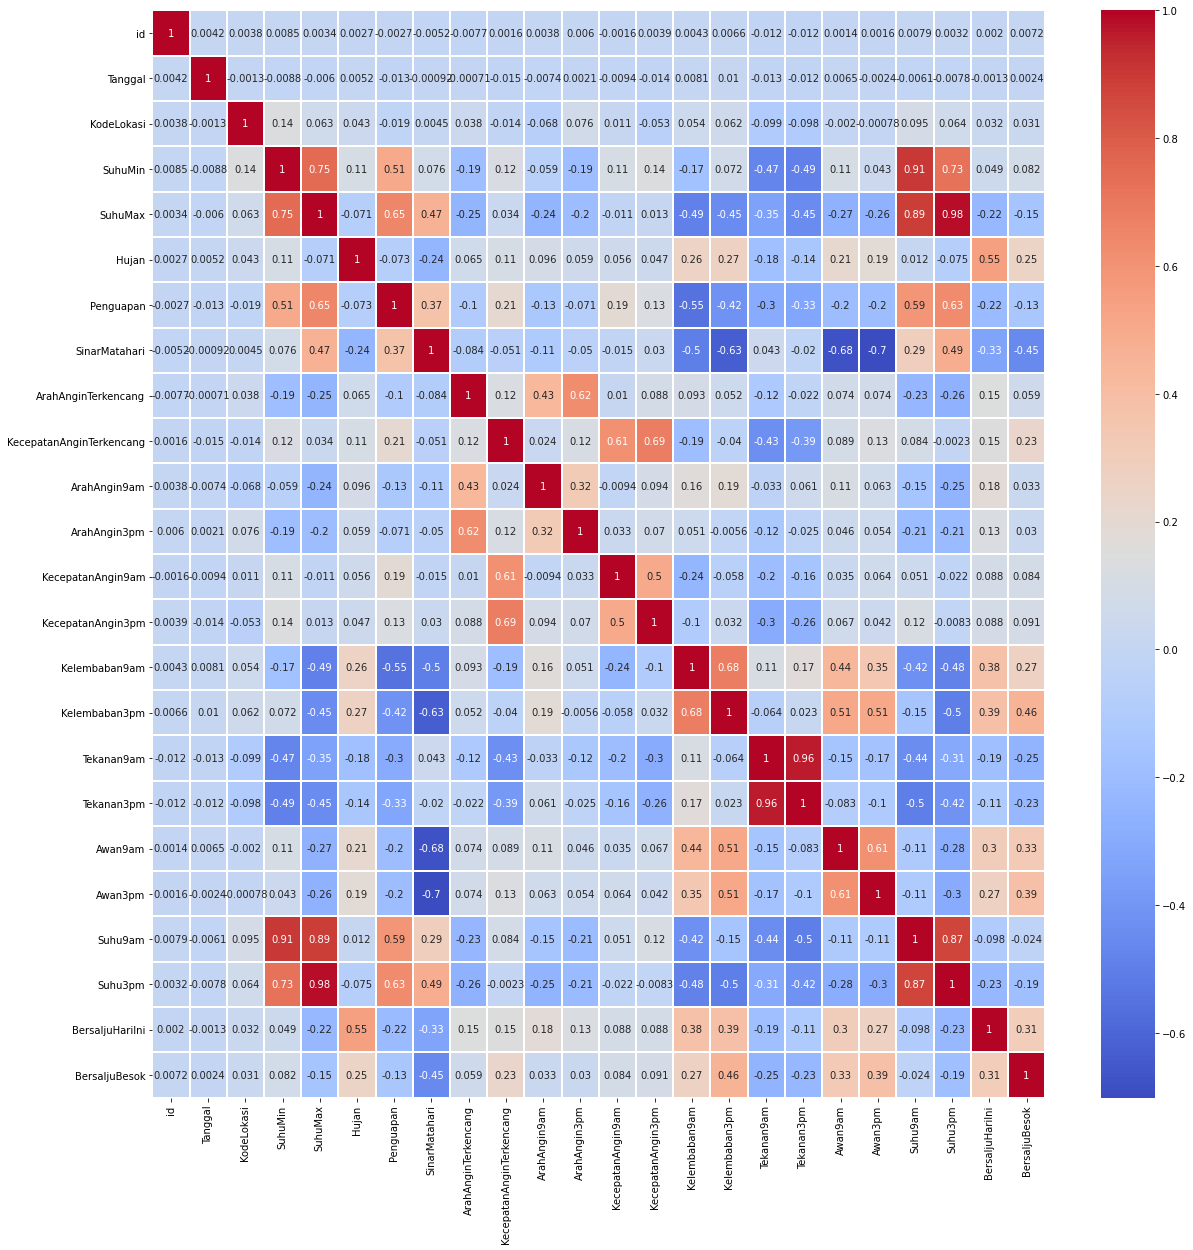

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),
            cmap='coolwarm',
            annot=True,linewidths=1);

<p>Seleksi atribut yang memiliki korelasi yang tergolong tinggi </p>

In [63]:
newdata = ["BersaljuBesok", "SuhuMin", "SuhuMax", "Suhu9am", "Suhu3pm", "Penguapan", "SinarMatahari", "Awan9am", "Awan3pm", "Kelembaban9am", "Kelembaban3pm"]
databaru = dataset[newdata]
databaru.head()
databaru

,BersaljuBesok,SuhuMin,SuhuMax,Suhu9am,Suhu3pm,Penguapan,SinarMatahari,Awan9am,Awan3pm,Kelembaban9am,Kelembaban3pm
3,0,7.3,24.5,15.3,23.2,8.4,10.4,1.0,7.0,25.0,17.0
4,0,5.9,20.3,12.4,18.1,3.6,12.6,2.0,6.0,55.0,48.0
5,0,14.4,21.8,16.7,21.1,3.2,4.4,7.0,7.0,63.0,52.0
6,0,7.7,18.7,11.3,18.3,5.6,9.7,1.0,1.0,69.0,31.0
8,0,18.4,35.3,23.7,34.9,10.0,12.5,0.0,0.0,44.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
109080,0,16.8,34.1,25.6,33.0,12.8,10.3,1.0,4.0,48.0,28.0
109082,0,8.7,19.0,10.8,16.5,1.4,9.6,2.0,2.0,81.0,59.0
109088,0,14.3,26.2,21.1,25.5,8.0,12.6,0.0,2.0,51.0,37.0
109090,1,20.1,23.7,22.0,22.1,7.2,8.9,4.0,6.0,74.0,70.0


<p>Menampilkan boxplot pada setiap atribut untuk melihat data yang termasuk ke dalam outlier</p>

<AxesSubplot:>

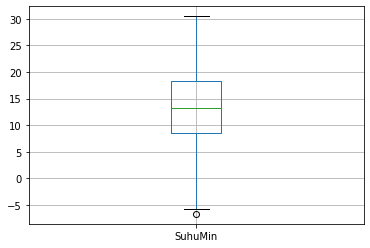

In [64]:
databaru.boxplot(column=["SuhuMin"])

<AxesSubplot:>

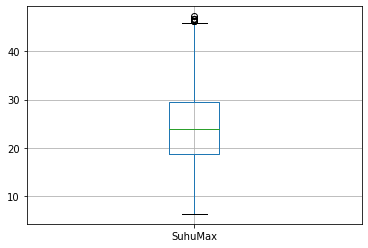

In [65]:
databaru.boxplot(column=["SuhuMax"])

<AxesSubplot:>

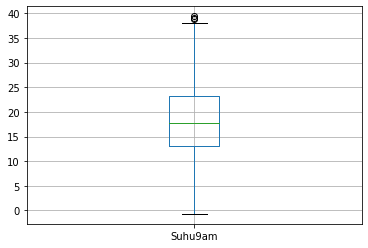

In [66]:
databaru.boxplot(column=["Suhu9am"])

<AxesSubplot:>

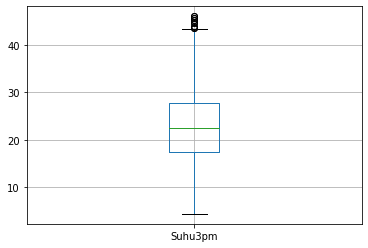

In [67]:
databaru.boxplot(column=["Suhu3pm"])

<AxesSubplot:>

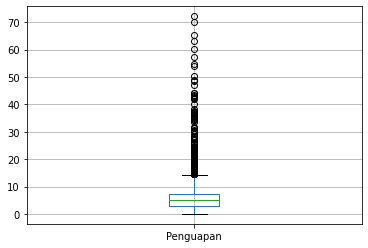

In [68]:
databaru.boxplot(column=["Penguapan"])

<AxesSubplot:>

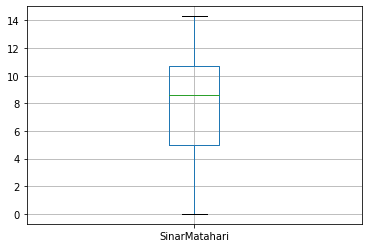

In [69]:
databaru.boxplot(column=["SinarMatahari"])

<AxesSubplot:>

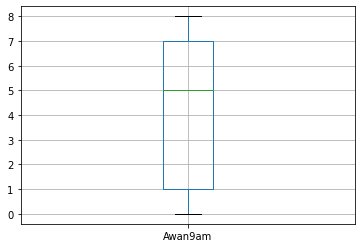

In [70]:
databaru.boxplot(column=["Awan9am"])

<AxesSubplot:>

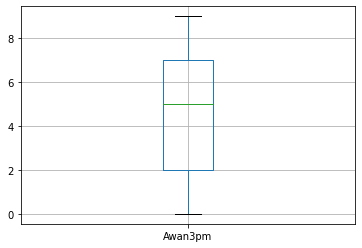

In [71]:
databaru.boxplot(column=["Awan3pm"])

<AxesSubplot:>

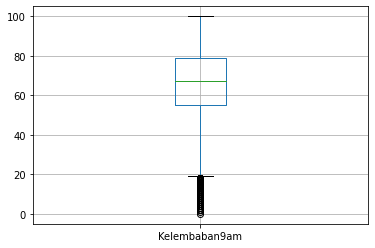

In [72]:
databaru.boxplot(column=["Kelembaban9am"])

<AxesSubplot:>

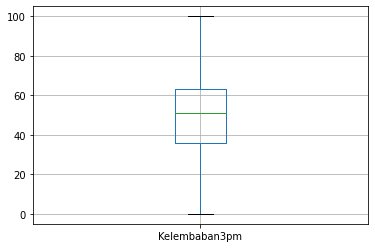

In [73]:
databaru.boxplot(column=["Kelembaban3pm"])

<p>Drop data yang tergolong outlier</p>

In [74]:
databaru.drop(databaru[databaru.SuhuMin < -5].index ,inplace =True)
databaru.drop(databaru[databaru.SuhuMax > 40].index ,inplace =True)
databaru.drop(databaru[databaru.Suhu9am > 37].index ,inplace =True)
databaru.drop(databaru[databaru.Suhu3pm > 41].index ,inplace =True)
databaru.drop(databaru[databaru.Penguapan > 13].index ,inplace =True)
databaru.drop(databaru[databaru.Kelembaban9am < 20].index ,inplace =True)
databaru

,BersaljuBesok,SuhuMin,SuhuMax,Suhu9am,Suhu3pm,Penguapan,SinarMatahari,Awan9am,Awan3pm,Kelembaban9am,Kelembaban3pm
3,0,7.3,24.5,15.3,23.2,8.4,10.4,1.0,7.0,25.0,17.0
4,0,5.9,20.3,12.4,18.1,3.6,12.6,2.0,6.0,55.0,48.0
5,0,14.4,21.8,16.7,21.1,3.2,4.4,7.0,7.0,63.0,52.0
6,0,7.7,18.7,11.3,18.3,5.6,9.7,1.0,1.0,69.0,31.0
8,0,18.4,35.3,23.7,34.9,10.0,12.5,0.0,0.0,44.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
109080,0,16.8,34.1,25.6,33.0,12.8,10.3,1.0,4.0,48.0,28.0
109082,0,8.7,19.0,10.8,16.5,1.4,9.6,2.0,2.0,81.0,59.0
109088,0,14.3,26.2,21.1,25.5,8.0,12.6,0.0,2.0,51.0,37.0
109090,1,20.1,23.7,22.0,22.1,7.2,8.9,4.0,6.0,74.0,70.0


<p>Menyeragamkan scaling pada tiap atribut</p>

In [75]:
mms = MinMaxScaler()
scaler = mms.fit_transform(databaru)
col_new = ["BersaljuBesok", "suhuMin", "SuhuMax", "Suhu9am", "Suhu3pm", "Penguapan","SinarMatahari", "Awan9am", "Awan3pm", "Kelembaban9am", "Kelembaban3pm"]
scaledData = pd.DataFrame(scaler,columns=col_new)
scaledData

,BersaljuBesok,suhuMin,SuhuMax,Suhu9am,Suhu3pm,Penguapan,SinarMatahari,Awan9am,Awan3pm,Kelembaban9am,Kelembaban3pm
0,0.0,0.352601,0.540059,0.431267,0.535411,0.646154,0.727273,0.125,0.777778,0.0625,0.161616
1,0.0,0.312139,0.415430,0.353100,0.390935,0.276923,0.881119,0.250,0.666667,0.4375,0.474747
2,0.0,0.557803,0.459941,0.469003,0.475921,0.246154,0.307692,0.875,0.777778,0.5375,0.515152
3,0.0,0.364162,0.367953,0.323450,0.396601,0.430769,0.678322,0.125,0.111111,0.6125,0.303030
4,0.0,0.673410,0.860534,0.657682,0.866856,0.769231,0.874126,0.000,0.000000,0.3000,0.171717
...,...,...,...,...,...,...,...,...,...,...,...
40416,0.0,0.627168,0.824926,0.708895,0.813031,0.984615,0.720280,0.125,0.444444,0.3500,0.272727
40417,0.0,0.393064,0.376855,0.309973,0.345609,0.107692,0.671329,0.250,0.222222,0.7625,0.585859
40418,0.0,0.554913,0.590504,0.587601,0.600567,0.615385,0.881119,0.000,0.222222,0.3875,0.363636
40419,1.0,0.722543,0.516320,0.611860,0.504249,0.553846,0.622378,0.500,0.666667,0.6750,0.696970


<p>Simpan data yang sudah bersih dan memiliki skala seragam ke dalam csv</p>

In [76]:
scaledData.to_csv('prepared_salju_train.csv')

<p>Cek lagi korelasinya</p>

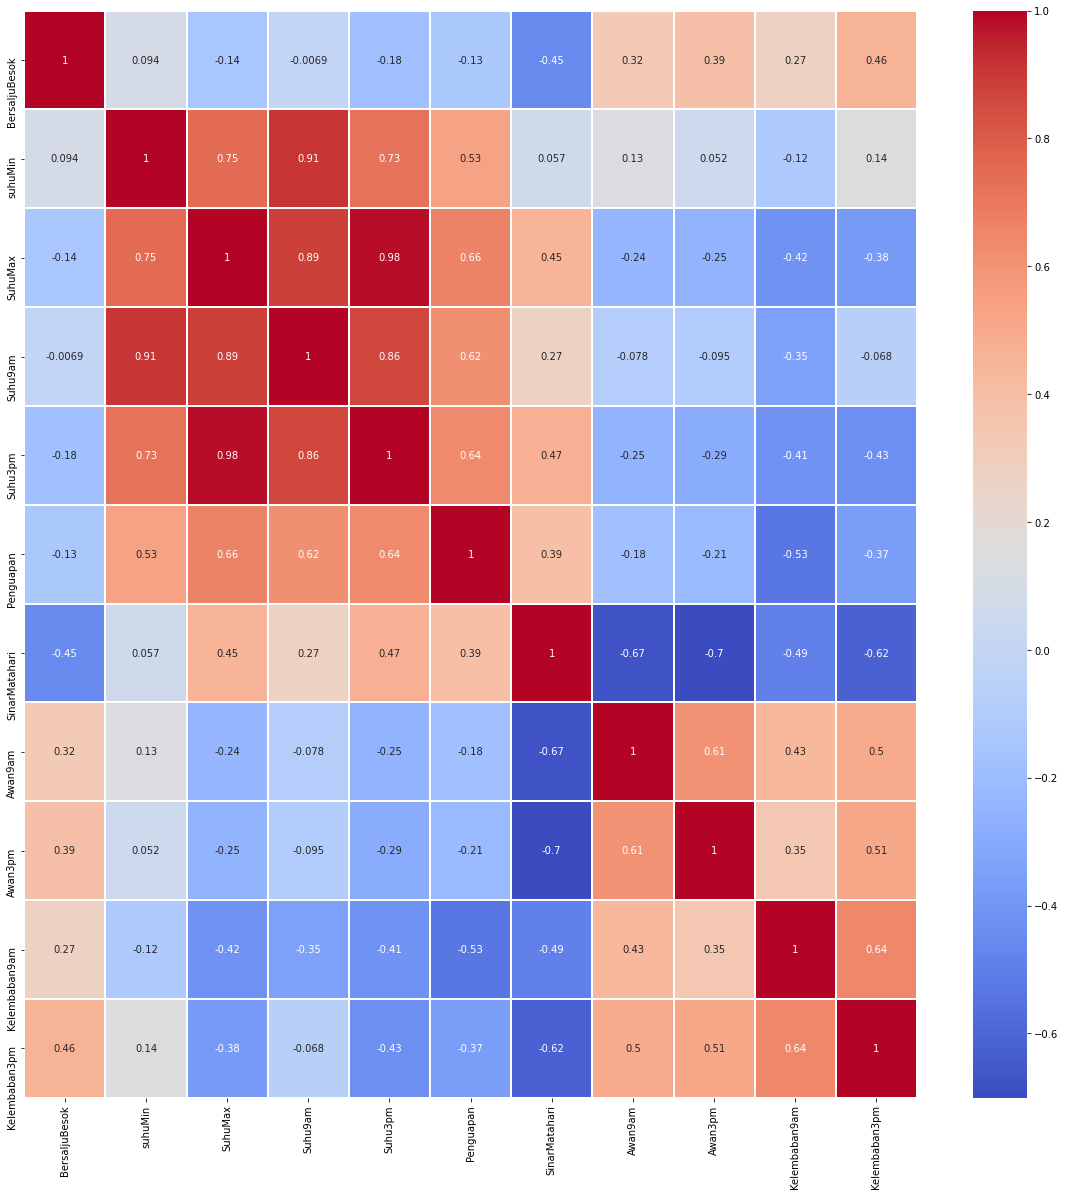

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(scaledData.corr(),
            cmap='coolwarm',
            annot=True,linewidths=1);

<p>Dikarenakan tujuan dari proses clustering ini adalah untuk memprediksi apakah pada hari berikutnya akan turun salju atau tidak, maka saya mengambil atribut Awan3pm dan Kelembaban3pm karena memiliki nilai korelasi tertinggi terhadap atribut BersaljuBesok</p>

In [114]:
prepData = pd.read_csv("prepared_salju_train.csv", usecols=["Awan3pm", "Kelembaban3pm", "BersaljuBesok"])
prepData.head()
prepData

,BersaljuBesok,Awan3pm,Kelembaban3pm
0,0.0,0.777778,0.161616
1,0.0,0.666667,0.474747
2,0.0,0.777778,0.515152
3,0.0,0.111111,0.303030
4,0.0,0.000000,0.171717
...,...,...,...
40416,0.0,0.444444,0.272727
40417,0.0,0.222222,0.585859
40418,0.0,0.222222,0.363636
40419,1.0,0.666667,0.696970


<p>Evaluasi dari dataset yang sudah bersih menggunakan SSE dan metode elbow untuk melihat berapa jumlah cluster yang optimal pada dataset yang dipakai</p>

In [39]:
epsilon = list(range(5)) # Initialisation of epsilon which would store cost function for each value of 'k' after final iteration.

for k in range(1,6): # Number of clusters
    
    cluster = pd.read_csv("prepared_salju_train.csv", usecols=["Awan3pm", "Kelembaban3pm"], nrows=20000) # Read data file into 'cluster'
    
    rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
    cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.
  
    centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
    centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
    centroids.set_index('new',inplace = True) 
    d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

    number_of_iterations = 15
    temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

    for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

        for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
            d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
        cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

        mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
        mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
        for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
            mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['Awan3pm'].mean()
            mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['Kelembaban3pm'].mean()
        centroids.replace(list(centroids['Awan3pm']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
        centroids.replace(list(centroids['Kelembaban3pm']),mean_y,inplace = True)
    
        z = list(range(k)) # Initialisation of z  and centroid of each cluster.
        for p in range(0,k): # This 'for' loop calculates square of distances between data points and centroid of each cluster.
            z[p] = ((cluster[cluster['centroid number'] == p+1][['Awan3pm','Kelembaban3pm']] - centroids.iloc[p])**2).values.sum()
        temp_epsilon[i] = sum(z) 
        
        epsilon[k-1] = temp_epsilon[i] # The cost function after final iteration for each value of 'k' would be stored in epsilon.
    
    %reset_selective -f centroids # The dataframe 'centroids' is reset.


Text(0, 0.5, 'Value of Epsilon')

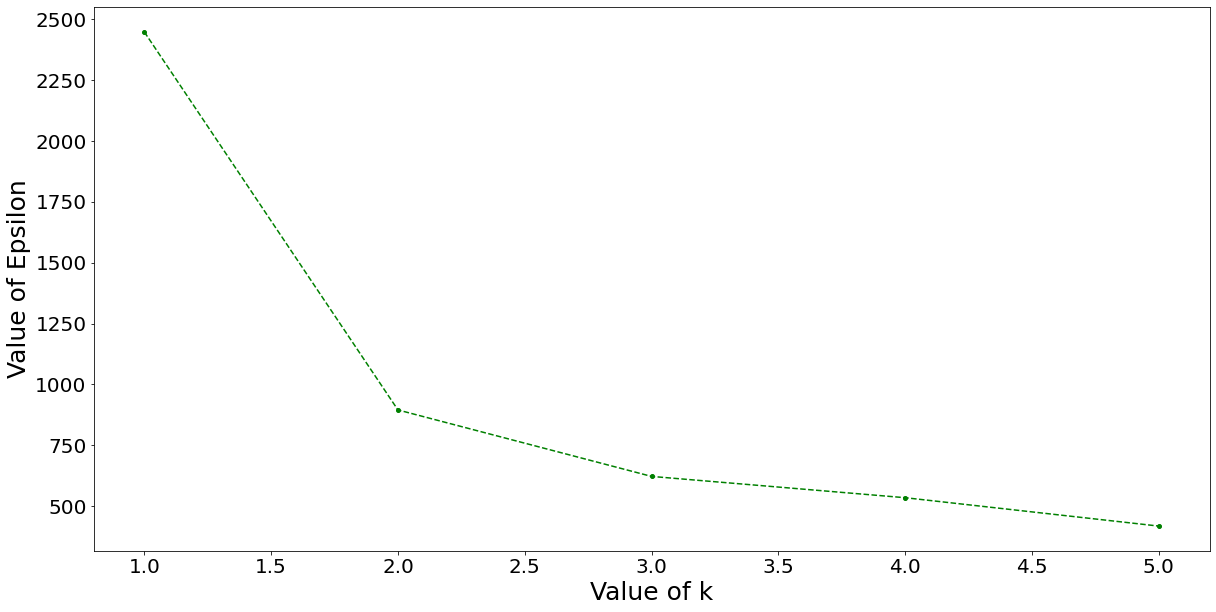

In [40]:
k = list(range(1,6)) # Range of 'k'
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(k,epsilon,'go--', linewidth=1.5, markersize=4) # Graph is plotted.
plt.xlabel('Value of k',fontsize = 25) # x-axis is labelled.
plt.ylabel('Value of Epsilon',fontsize = 25) # y-axis is labelled.

<p>Konversi dataframe ke dalam bentuk array, karena menurut saya array lebih mudah untuk diolah dibandingkan jika masih dalam bentuk dataframe</p>

In [116]:
dataAwan3pm = prepData.Awan3pm
dataKelembaban3pm = prepData.Kelembaban3pm
dataBersaljuBesok = prepData.BersaljuBesok
newPrepData = []
i = 0
while i<len(prepData):
    data = [dataAwan3pm[i], dataKelembaban3pm[i], dataBersaljuBesok[i]]
    newPrepData.append(data)
    i+=1

<h2>Proses Clustering</h2>

<p>Fungsi manhattanDistance untuk mencari nilai distance antara dua titik</p>

In [117]:
def manhattanDistance(centroid, data):
    hasil = abs(float(centroid[0]-data[0])) + abs(float(centroid[1]-data[1])) 
    return hasil

<p>Fungsi untuk menentukan centroid baru pada setiap iterasi</p>

In [118]:
def newCentroid(cluster):
    x = 0
    y = 0
    for i in range(len(cluster)):
        x = x+cluster[i][0]
        y = y+cluster[i][1]
    averageX = x/len(cluster)
    averageY = y/len(cluster)
    centroid = [averageX, averageY]
    return centroid

<p>Fungsi untuk melakukan KMeans clustering</p>

In [119]:
def KMeans(dataset, max_iteration):
    centroid1 = dataset[rd.randint(0,39744)]
    centroid2 = dataset[rd.randint(0,39744)]
    selisih = 1
    iteration = 0
    while (selisih!=0) and (iteration<max_iteration):
        cluster1 = []
        cluster2 = []
        oldCentroid1 = centroid1
        oldCentroid2 = centroid2
        for j in range(len(dataset)):
            distance1 = manhattanDistance(oldCentroid1, dataset[j])
            distance2 = manhattanDistance(oldCentroid2, dataset[j])
            if distance1<distance2:
                cluster1.append(dataset[j])
            else:
                cluster2.append(dataset[j])
        centroid1 = newCentroid(cluster1)
        centroid2 = newCentroid(cluster2)
        selisih = (centroid1[0]-oldCentroid1[0])+(centroid1[1]-oldCentroid1[1])+(centroid2[0]-oldCentroid2[0])+(centroid2[1]-oldCentroid2[1])
        iteration += 1
    centroids = [centroid1, centroid2]
    return centroids, cluster1, cluster2
    

In [121]:
centroids, cluster1, cluster2 = KMeans(newPrepData, 100)

In [124]:
awan3pmc1 = []
kelembaban3pmc1 = []
awan3pmc2 = []
kelembaban3pmc2 = []

for k in range(len(cluster1)):
    awan3pmc1.append(cluster1[k][0])
    kelembaban3pmc1.append(cluster1[k][1])
for l in range(len(cluster2)):
    awan3pmc2.append(cluster2[l][0])
    kelembaban3pmc2.append(cluster2[l][1])

<p>Tampilkan cluster1 dan cluster2 ke dalam bentuk grafik</p>

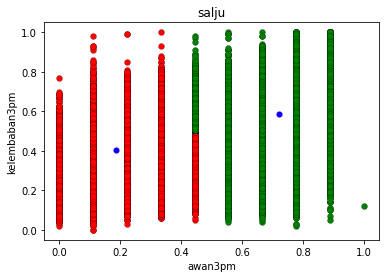

In [125]:
plt.scatter(awan3pmc1, kelembaban3pmc1, c='r', edgecolors='black', linewidth=0.19)
plt.scatter(awan3pmc2, kelembaban3pmc2, c='g', edgecolors='black', linewidth=0.19)
plt.scatter(centroids[0][0], centroids[0][1], c ='b', edgecolors='magenta', linewidth=0.19)
plt.scatter(centroids[1][0], centroids[1][1], c ='b', edgecolors='magenta', linewidth=0.19)
plt.title('salju')
plt.xlabel('awan3pm')
plt.ylabel('kelembaban3pm')
plt.show()

<p>Kembalikan array ke dalam bentuk dataframe untuk disimpan ke dalam csv</p>

In [128]:
awan3pmc1, kelembaban3pmc1, bersaljubesokc1 = zip(*cluster1)
frameCluster1 = pd.DataFrame({'Awan3pm': awan3pmc1, 'Kelembaban3pm': kelembaban3pmc1}, columns=['Awan3pm', 'Kelembaban3pm'])
frameCluster1

awan3pmc2, kelembaban3pmc2, bersaljubesokc2 = zip(*cluster2)
frameCluster2 = pd.DataFrame({'Awan3pm': awan3pmc2, 'Kelembaban3pm': kelembaban3pmc2}, columns=['Awan3pm', 'Kelembaban3pm'])

<p>Proses labeling</p>

In [133]:
frameCluster1['Cluster'] = 'Tidak Bersalju'
frameCluster2['Cluster'] = 'Bersalju'

<p>Data pada kedua cluster sudah digabung dan siap untuk disimpan ke dalam csv</p>

In [144]:
frameClusters = pd.concat([frameCluster1, frameCluster2], axis=0)
frameClusters

,Awan3pm,Kelembaban3pm,Cluster
0,0.111111,0.303030,Tidak Bersalju
1,0.000000,0.171717,Tidak Bersalju
2,0.111111,0.353535,Tidak Bersalju
3,0.444444,0.282828,Tidak Bersalju
4,0.000000,0.111111,Tidak Bersalju
...,...,...,...
22673,0.777778,0.484848,Bersalju
22674,0.555556,0.676768,Bersalju
22675,0.777778,0.656566,Bersalju
22676,0.777778,0.717172,Bersalju


<p>Simpan hasil akhir clustering ke dalam csv</p>

In [145]:
frameClusters
frameClusters.to_csv('Hasil_Clustering.csv')